In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = df.drop('Name', axis = 1)

In [5]:
df = df.drop('Ticket', axis = 1)

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Embarked'] = df['Embarked'].fillna('X')

In [8]:
df[df['Cabin'].isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
5,6,0,3,male,NaN,0,0,8.4583,NaN,Q
7,8,0,3,male,2.0,3,1,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,male,25.0,0,0,7.0500,NaN,S
885,886,0,3,female,39.0,0,5,29.1250,NaN,Q
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S


In [9]:
df['Cabin'] = df['Cabin'].fillna('X000')

In [10]:
df[df['Cabin'].str.contains(' ')]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
27,28,0,1,male,19.00,3,2,263.0000,C23 C25 C27,S
75,76,0,3,male,25.00,0,0,7.6500,F G73,S
88,89,1,1,female,23.00,3,2,263.0000,C23 C25 C27,S
97,98,1,1,male,23.00,0,1,63.3583,D10 D12,C
118,119,0,1,male,24.00,0,1,247.5208,B58 B60,C
128,129,1,3,female,NaN,1,1,22.3583,F E69,C
297,298,0,1,female,2.00,1,2,151.5500,C22 C26,S
299,300,1,1,female,50.00,0,1,247.5208,B58 B60,C
305,306,1,1,male,0.92,1,2,151.5500,C22 C26,S
311,312,1,1,female,18.00,2,2,262.3750,B57 B59 B63 B66,C


In [11]:
multi_cabin_rows = df['Cabin'].str.contains(' ', na=False)

In [12]:
df.loc[multi_cabin_rows, 'Cabin'] = df.loc[multi_cabin_rows, 'Cabin'].str.split()
df_exploded = df.explode('Cabin', ignore_index=True)

In [13]:
df_exploded.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,X000,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,X000,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,X000,S


In [14]:
print(df_exploded)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
0              1         0       3    male  22.0      1      0   7.2500  X000   
1              2         1       1  female  38.0      1      0  71.2833   C85   
2              3         1       3  female  26.0      0      0   7.9250  X000   
3              4         1       1  female  35.0      1      0  53.1000  C123   
4              5         0       3    male  35.0      0      0   8.0500  X000   
..           ...       ...     ...     ...   ...    ...    ...      ...   ...   
920          887         0       2    male  27.0      0      0  13.0000  X000   
921          888         1       1  female  19.0      0      0  30.0000   B42   
922          889         0       3  female   NaN      1      2  23.4500  X000   
923          890         1       1    male  26.0      0      0  30.0000  C148   
924          891         0       3    male  32.0      0      0   7.7500  X000   

    Embarked  
0          S

In [15]:
single_letter_cabins = df_exploded[df_exploded['Cabin'].str.match(r'^[A-Za-z]$')]
print(single_letter_cabins)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
77            76         0       3    male  25.0      0      0   7.6500     F   
135          129         1       3  female   NaN      1      1  22.3583     F   
300          293         0       2    male  36.0      0      0  12.8750     D   
341          328         1       2  female  36.0      0      0  13.0000     D   
353          340         0       1    male  45.0      0      0  35.5000     T   
493          474         1       2  female  23.0      0      0  13.7917     D   
722          700         0       3    male  42.0      0      0   7.6500     F   
740          716         0       3    male  19.0      0      0   7.6500     F   

    Embarked  
77         S  
135        C  
300        C  
341        S  
353        S  
493        C  
722        S  
740        S  


In [16]:
df_exploded[['Deck', 'Number']] = df_exploded['Cabin'].str.extract(r'([A-Za-z])(\d+)')
print(df_exploded)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
0              1         0       3    male  22.0      1      0   7.2500  X000   
1              2         1       1  female  38.0      1      0  71.2833   C85   
2              3         1       3  female  26.0      0      0   7.9250  X000   
3              4         1       1  female  35.0      1      0  53.1000  C123   
4              5         0       3    male  35.0      0      0   8.0500  X000   
..           ...       ...     ...     ...   ...    ...    ...      ...   ...   
920          887         0       2    male  27.0      0      0  13.0000  X000   
921          888         1       1  female  19.0      0      0  30.0000   B42   
922          889         0       3  female   NaN      1      2  23.4500  X000   
923          890         1       1    male  26.0      0      0  30.0000  C148   
924          891         0       3    male  32.0      0      0   7.7500  X000   

    Embarked Deck Number  


In [17]:
df_exploded[df_exploded['Deck'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Number
77,76,0,3,male,25.0,0,0,7.6500,F,S,NaN,NaN
135,129,1,3,female,NaN,1,1,22.3583,F,C,NaN,NaN
300,293,0,2,male,36.0,0,0,12.8750,D,C,NaN,NaN
341,328,1,2,female,36.0,0,0,13.0000,D,S,NaN,NaN
353,340,0,1,male,45.0,0,0,35.5000,T,S,NaN,NaN
493,474,1,2,female,23.0,0,0,13.7917,D,C,NaN,NaN
722,700,0,3,male,42.0,0,0,7.6500,F,S,NaN,NaN
740,716,0,3,male,19.0,0,0,7.6500,F,S,NaN,NaN


In [18]:
single_letter_cabins = df_exploded[df_exploded['Cabin'].str.match(r'^[A-Za-z]000$')]
print(single_letter_cabins)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
0              1         0       3    male  22.0      1      0   7.2500  X000   
2              3         1       3  female  26.0      0      0   7.9250  X000   
4              5         0       3    male  35.0      0      0   8.0500  X000   
5              6         0       3    male   NaN      0      0   8.4583  X000   
7              8         0       3    male   2.0      3      1  21.0750  X000   
..           ...       ...     ...     ...   ...    ...    ...      ...   ...   
918          885         0       3    male  25.0      0      0   7.0500  X000   
919          886         0       3  female  39.0      0      5  29.1250  X000   
920          887         0       2    male  27.0      0      0  13.0000  X000   
922          889         0       3  female   NaN      1      2  23.4500  X000   
924          891         0       3    male  32.0      0      0   7.7500  X000   

    Embarked Deck Number  


In [19]:
df_exploded.loc[single_letter_cabins.index, 'Deck'] = single_letter_cabins['Cabin'].str[0]

In [20]:
single_letter_cabins = df_exploded[df_exploded['Cabin'].str.match(r'^[A-Za-z]$')]
print(single_letter_cabins[['Cabin', 'Deck']])

    Cabin Deck
77      F  NaN
135     F  NaN
300     D  NaN
341     D  NaN
353     T  NaN
493     D  NaN
722     F  NaN
740     F  NaN


In [21]:
df_exploded.loc[single_letter_cabins.index, 'Deck'] = single_letter_cabins['Cabin'].str[0]

In [22]:
remaining_nan_deck = df_exploded[df_exploded['Deck'].isnull()]
print(remaining_nan_deck[['Cabin', 'Deck']])

Empty DataFrame
Columns: [Cabin, Deck]
Index: []


In [23]:
df_exploded[df_exploded['Deck'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Number


In [24]:
df_exploded.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            178
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
Deck             0
Number           8
dtype: int64

In [25]:
df_exploded[df_exploded['Number'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Number
77,76,0,3,male,25.0,0,0,7.6500,F,S,F,NaN
135,129,1,3,female,NaN,1,1,22.3583,F,C,F,NaN
300,293,0,2,male,36.0,0,0,12.8750,D,C,D,NaN
341,328,1,2,female,36.0,0,0,13.0000,D,S,D,NaN
353,340,0,1,male,45.0,0,0,35.5000,T,S,T,NaN
493,474,1,2,female,23.0,0,0,13.7917,D,C,D,NaN
722,700,0,3,male,42.0,0,0,7.6500,F,S,F,NaN
740,716,0,3,male,19.0,0,0,7.6500,F,S,F,NaN


In [26]:
df_exploded['Number'] = pd.to_numeric(df_exploded['Number'], errors='coerce')

In [27]:
median_values = df_exploded.groupby('Deck')['Number'].median()

In [28]:
df_exploded['Number'] = df_exploded.apply(
    lambda row: median_values[row['Deck']] if pd.isnull(row['Number']) else row['Number'],
    axis=1)

In [29]:
remaining_nan_numbers = df_exploded[df_exploded['Number'].isnull()]
print(remaining_nan_numbers[['Cabin', 'Deck', 'Number']])

    Cabin Deck  Number
353     T    T     NaN


In [30]:
df_exploded['Number'] = df_exploded['Number'].fillna(0)

In [31]:
df_exploded.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            178
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
Deck             0
Number           0
dtype: int64

In [32]:
df_exploded[df_exploded['Age'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Number
5,6,0,3,male,NaN,0,0,8.4583,X000,Q,X,0.0
17,18,1,2,male,NaN,0,0,13.0000,X000,S,X,0.0
19,20,1,3,female,NaN,0,0,7.2250,X000,C,X,0.0
26,27,0,3,male,NaN,0,0,7.2250,X000,C,X,0.0
30,29,1,3,female,NaN,0,0,7.8792,X000,Q,X,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
891,860,0,3,male,NaN,0,0,7.2292,X000,C,X,0.0
895,864,0,3,female,NaN,8,2,69.5500,X000,S,X,0.0
900,869,0,3,male,NaN,0,0,9.5000,X000,S,X,0.0
912,879,0,3,male,NaN,0,0,7.8958,X000,S,X,0.0


In [33]:
age_medians = df_exploded.groupby('Pclass')['Age'].median()

In [34]:
df_exploded['Age'] = df_exploded.apply(lambda row: age_medians[row['Pclass']] if pd.isna(row['Age']) else row['Age'], axis=1)

In [35]:
df_exploded.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Deck           0
Number         0
dtype: int64

In [36]:
sex_encoded = {'male': 0, 'female': 1}
df_exploded['Sex'] = df_exploded['Sex'].map(sex_encoded)


In [37]:
df_exploded.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Number
0,1,0,3,0,22.0,1,0,7.2500,X000,S,X,0.0
1,2,1,1,1,38.0,1,0,71.2833,C85,C,C,85.0
2,3,1,3,1,26.0,0,0,7.9250,X000,S,X,0.0
3,4,1,1,1,35.0,1,0,53.1000,C123,S,C,123.0
4,5,0,3,0,35.0,0,0,8.0500,X000,S,X,0.0


In [38]:
embarked_encoded = {'X': 0, 'S': 1, 'C': 2, 'Q':3}
df_exploded['Embarked'] = df_exploded['Embarked'].map(embarked_encoded)


In [39]:
Deck_encoded = {'X': 0, 'A': 1, 'B': 2, 'C':3, 'D': 4, 'E':5, 'F': 6, 'G': 7, 'T': 8}
df_exploded['Deck'] = df_exploded['Deck'].map(Deck_encoded)


In [40]:
df_exploded.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked         int64
Deck             int64
Number         float64
dtype: object

In [41]:
df_exploded=df_exploded.drop('Cabin', axis=1)

In [42]:
df_exploded.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
Deck             int64
Number         float64
dtype: object

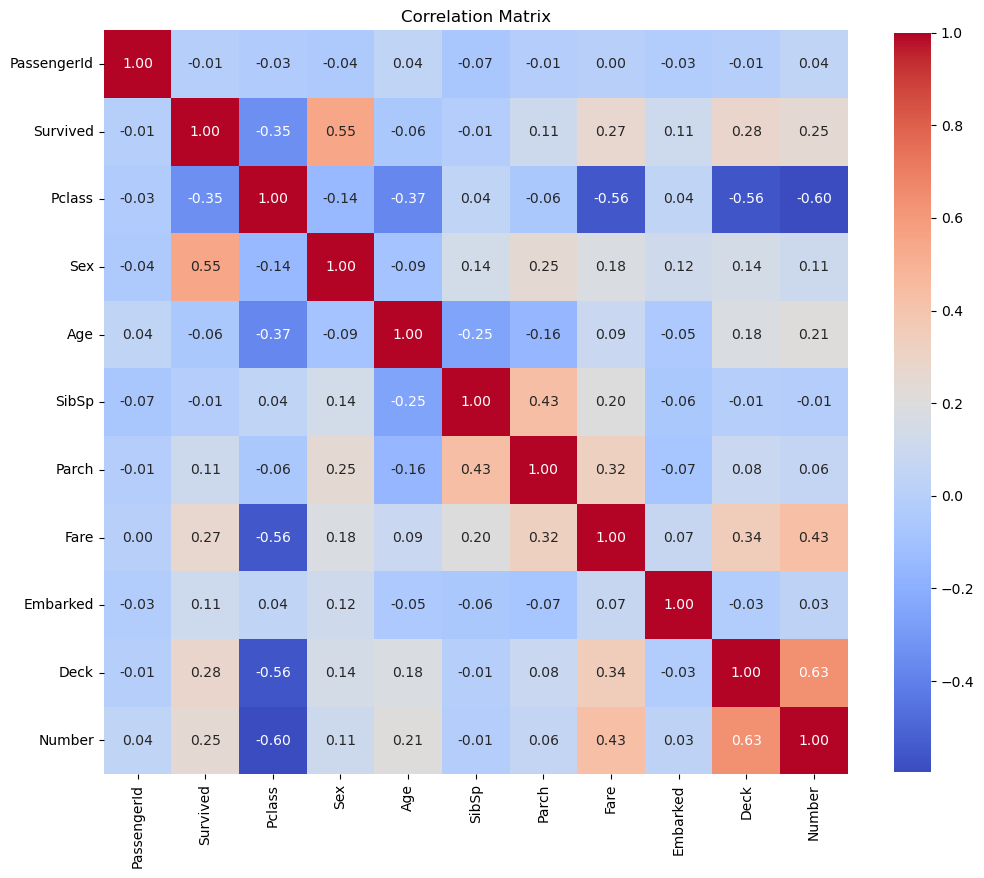

In [43]:
correlation_matrix=df_exploded.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

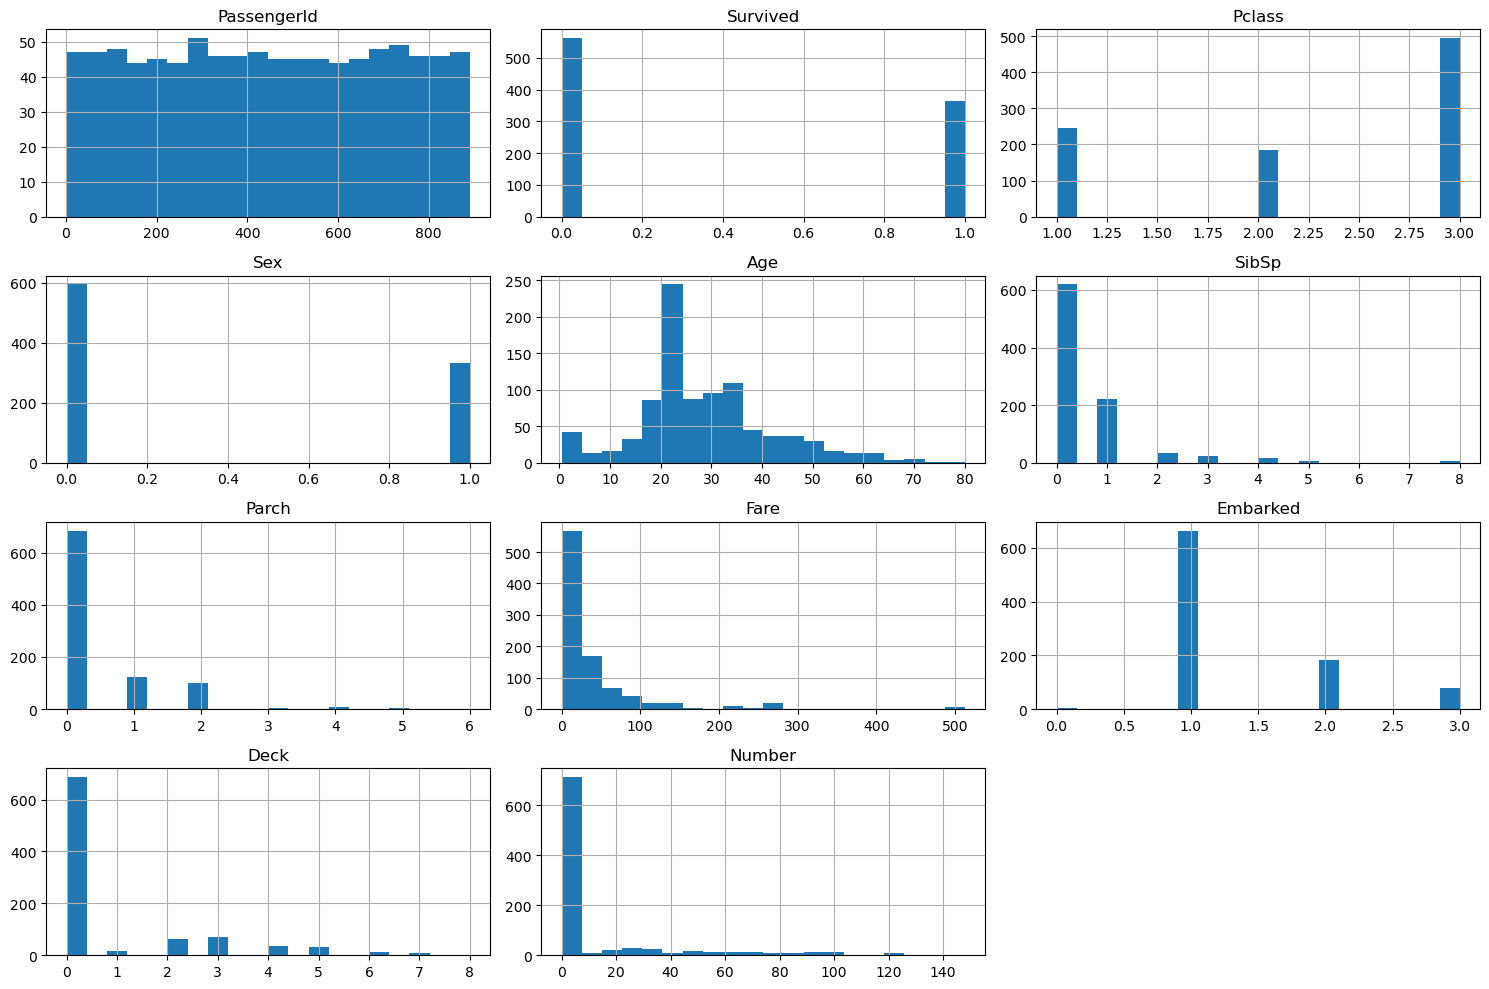

In [44]:
df_exploded.hist(bins=20, figsize=(15, 10))  # Adjust 'bins' and 'figsize' as desired
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Number'}>, <Axes: >]], dtype=object)

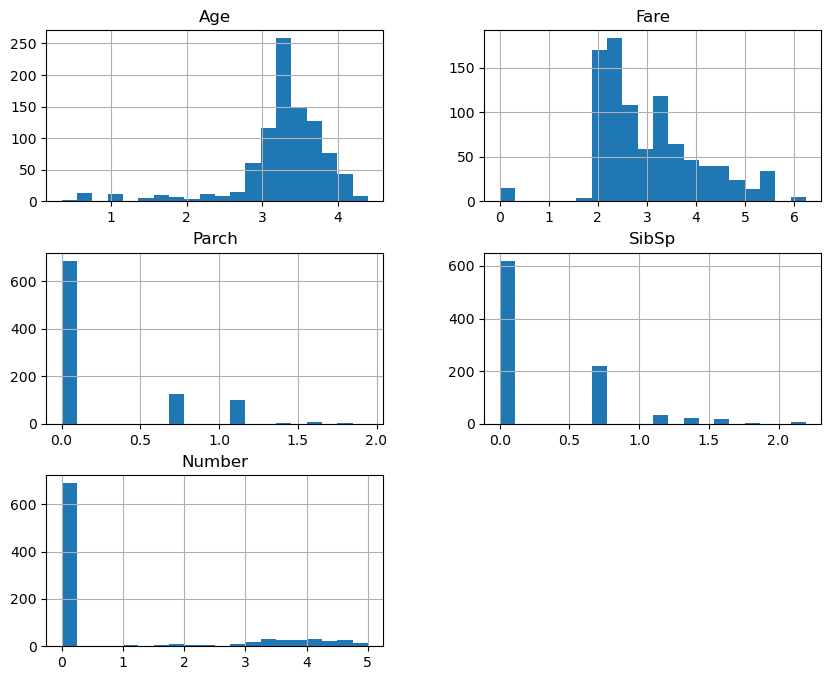

In [45]:
columns_to_log_transform = ['Age', 'Fare', 'Parch', 'SibSp', 'Number']
for col in columns_to_log_transform:
    if col in df_exploded.columns:
        df_exploded[col] = np.log1p(df_exploded[col])


df_exploded[columns_to_log_transform].hist(bins=20, figsize=(10, 8))

In [46]:
df_exploded['FamilySize'] = df_exploded['SibSp'] + df_exploded['Parch'] + 1

In [47]:
def age_group(age):
    if age < 16:
        return 0  
    elif age < 30:
        return 1  
    elif age < 60:
        return 2  
    else:
        return 3  

df['AgeGroup'] = df['Age'].apply(age_group)

In [48]:
df_exploded['FarePerPerson'] = df_exploded['Fare'] / df_exploded['FamilySize']

In [49]:
df_exploded.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Number,FamilySize,FarePerPerson
0,1,0,3,0,3.135494,0.693147,0.0,2.110213,1,0,0.000000,1.693147,1.246326
1,2,1,1,1,3.663562,0.693147,0.0,4.280593,2,3,4.454347,1.693147,2.528187
2,3,1,3,1,3.295837,0.000000,0.0,2.188856,1,0,0.000000,1.000000,2.188856
3,4,1,1,1,3.583519,0.693147,0.0,3.990834,1,3,4.820282,1.693147,2.357051
4,5,0,3,0,3.583519,0.000000,0.0,2.202765,1,0,0.000000,1.000000,2.202765


In [50]:
df_exploded['FamilySize'] = df_exploded['SibSp'] + df_exploded['Parch'] + 1

In [51]:
df_exploded.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Number,FamilySize,FarePerPerson
0,1,0,3,0,3.135494,0.693147,0.0,2.110213,1,0,0.000000,1.693147,1.246326
1,2,1,1,1,3.663562,0.693147,0.0,4.280593,2,3,4.454347,1.693147,2.528187
2,3,1,3,1,3.295837,0.000000,0.0,2.188856,1,0,0.000000,1.000000,2.188856
3,4,1,1,1,3.583519,0.693147,0.0,3.990834,1,3,4.820282,1.693147,2.357051
4,5,0,3,0,3.583519,0.000000,0.0,2.202765,1,0,0.000000,1.000000,2.202765


In [52]:
df_exploded['Age_Pclass'] = df_exploded['Age'] * df_exploded['Pclass']
df_exploded['Sex_Pclass'] = df_exploded['Sex'] * df_exploded['Pclass']

In [53]:
df_exploded.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Number,FamilySize,FarePerPerson,Age_Pclass,Sex_Pclass
0,1,0,3,0,3.135494,0.693147,0.0,2.110213,1,0,0.000000,1.693147,1.246326,9.406483,0
1,2,1,1,1,3.663562,0.693147,0.0,4.280593,2,3,4.454347,1.693147,2.528187,3.663562,1
2,3,1,3,1,3.295837,0.000000,0.0,2.188856,1,0,0.000000,1.000000,2.188856,9.887511,3
3,4,1,1,1,3.583519,0.693147,0.0,3.990834,1,3,4.820282,1.693147,2.357051,3.583519,1
4,5,0,3,0,3.583519,0.000000,0.0,2.202765,1,0,0.000000,1.000000,2.202765,10.750557,0


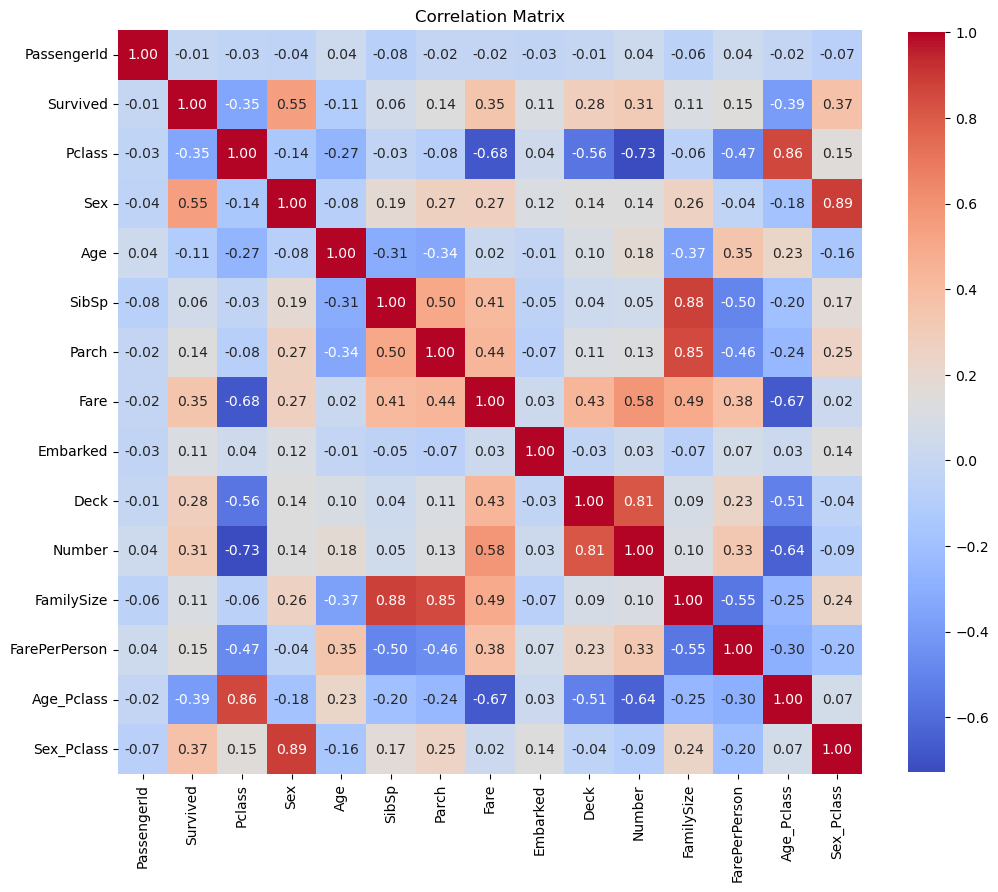

In [54]:
correlation_matrix=df_exploded.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [55]:
def min_max_scaling(df_exploded):
  for column in df_exploded.columns:
    df_exploded[column] = (df_exploded[column] - df_exploded[column].min()) / (df_exploded[column].max() - df_exploded[column].min())
  return df_exploded 

In [56]:
df_sc= min_max_scaling(df_exploded)
print(df_sc)

     PassengerId  Survived  Pclass  Sex       Age     SibSp     Parch  \
0       0.000000       0.0     1.0  0.0  0.688670  0.315465  0.000000   
1       0.001124       1.0     0.0  1.0  0.819257  0.315465  0.000000   
2       0.002247       1.0     1.0  1.0  0.728321  0.000000  0.000000   
3       0.003371       1.0     0.0  1.0  0.799463  0.315465  0.000000   
4       0.004494       0.0     1.0  0.0  0.799463  0.000000  0.000000   
..           ...       ...     ...  ...       ...       ...       ...   
920     0.995506       0.0     0.5  0.0  0.737315  0.000000  0.000000   
921     0.996629       1.0     0.0  1.0  0.654108  0.000000  0.000000   
922     0.997753       0.0     1.0  1.0  0.709289  0.315465  0.564575   
923     0.998876       1.0     0.0  0.0  0.728321  0.000000  0.000000   
924     1.000000       0.0     1.0  0.0  0.777946  0.000000  0.000000   

         Fare  Embarked   Deck    Number  FamilySize  FarePerPerson  \
0    0.338125  0.333333  0.000  0.000000    0.210310

In [57]:
corr_matrix = df_sc.corr().abs() 

threshold = 0.8

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

correlated_pairs = [(column, row) for column in upper_tri.columns for row in upper_tri.index if upper_tri.loc[row, column] > threshold]

print("Pairs of highly correlated features:")
for pair in correlated_pairs:
    print(pair)

Pairs of highly correlated features:
('Number', 'Deck')
('FamilySize', 'SibSp')
('FamilySize', 'Parch')
('Age_Pclass', 'Pclass')
('Sex_Pclass', 'Sex')


In [58]:
df_sc = df_sc.drop(columns=['Number', 'FamilySize', 'Sex'], axis=1)

In [59]:
df_sc

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Deck,FarePerPerson,Age_Pclass,Sex_Pclass
0,0.000000,0.0,1.0,0.688670,0.315465,0.000000,0.338125,0.333333,0.000,0.199702,0.711712,0.000000
1,0.001124,1.0,0.0,0.819257,0.315465,0.000000,0.685892,0.666667,0.375,0.405099,0.244813,0.333333
2,0.002247,1.0,1.0,0.728321,0.000000,0.000000,0.350727,0.333333,0.000,0.350727,0.750820,1.000000
3,0.003371,1.0,0.0,0.799463,0.315465,0.000000,0.639463,0.333333,0.375,0.377677,0.238306,0.333333
4,0.004494,0.0,1.0,0.799463,0.000000,0.000000,0.352955,0.333333,0.000,0.352955,0.820985,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
920,0.995506,0.0,0.5,0.737315,0.000000,0.000000,0.422864,0.333333,0.000,0.422864,0.488782,0.000000
921,0.996629,1.0,0.0,0.654108,0.000000,0.000000,0.550238,0.333333,0.250,0.550238,0.190519,0.333333
922,0.997753,0.0,1.0,0.709289,0.315465,0.564575,0.512205,0.333333,0.000,0.183470,0.732049,1.000000
923,0.998876,1.0,0.0,0.728321,0.000000,0.000000,0.550238,0.666667,0.375,0.550238,0.214917,0.000000


In [60]:
df_sc = df_sc.drop(columns=['PassengerId'], axis=1)

In [61]:
df_sc.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Deck,FarePerPerson,Age_Pclass,Sex_Pclass
0,0.0,1.0,0.688670,0.315465,0.0,0.338125,0.333333,0.000,0.199702,0.711712,0.000000
1,1.0,0.0,0.819257,0.315465,0.0,0.685892,0.666667,0.375,0.405099,0.244813,0.333333
2,1.0,1.0,0.728321,0.000000,0.0,0.350727,0.333333,0.000,0.350727,0.750820,1.000000
3,1.0,0.0,0.799463,0.315465,0.0,0.639463,0.333333,0.375,0.377677,0.238306,0.333333
4,0.0,1.0,0.799463,0.000000,0.0,0.352955,0.333333,0.000,0.352955,0.820985,0.000000


In [62]:
df_sc=df_sc.sample(frac=1,random_state=42).reset_index(drop=True)
split_idx = int(0.8 * len(df_sc))
x=df_sc.drop(columns=['Survived'],axis=1)
y=df_sc[['Survived']]
y_train=y[:split_idx]
y_test=y[split_idx:]
x_train=x[:split_idx]
x_test=x[split_idx:]

In [63]:
x_train=x_train.to_numpy()
x_test=x_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

Iteration 0: Loss = 0.6931471785599452
Iteration 100: Loss = 0.5900350072292339
Iteration 200: Loss = 0.5602838361694045
Iteration 300: Loss = 0.5470223317661016
Iteration 400: Loss = 0.5406636754465498
Iteration 500: Loss = 0.5374396663240831
Iteration 600: Loss = 0.5357289350951494
Iteration 700: Loss = 0.5347839303330313
Iteration 800: Loss = 0.5342417360020942
Iteration 900: Loss = 0.533918935771697
Iteration 1000: Loss = 0.5337196546946733
Iteration 1100: Loss = 0.5335922267157895
Iteration 1200: Loss = 0.5335079822522453
Iteration 1300: Loss = 0.5334505414102447
Iteration 1400: Loss = 0.5334102659551982
Iteration 1500: Loss = 0.5333813141418704
Accuracy: 0.8108108108108109


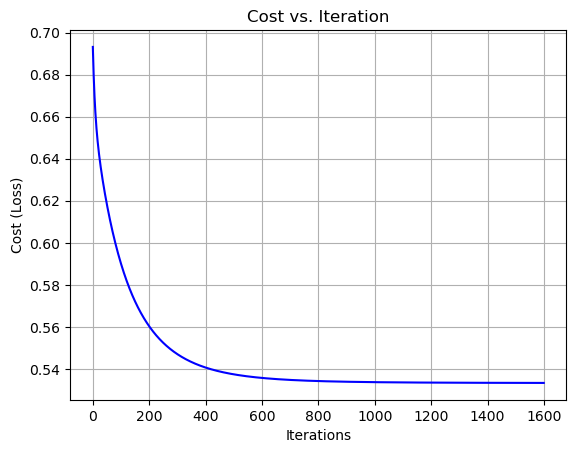

In [64]:
class LogisticRegression:
    def __init__(self, learning_rate=0.09, n_iters=1600, lambda_=0.01):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.lambda_ = lambda_  
        self.weights = None
        self.bias = None
        self.losses = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1 - y_true) * np.log(1 - y_pred + epsilon)
        loss = -np.mean(y1 + y2)

        
        loss += (self.lambda_ / 2) * np.sum(self.weights ** 2)

        return loss

    def report_loss(self, iteration):
        
        if iteration % 100 == 0:
            print(f"Iteration {iteration}: Loss = {self.losses[-1]}")

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            
            loss = self.compute_loss(y, y_predicted)
            self.losses.append(loss)

            
            self.report_loss(i)

            
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            
            dw += self.lambda_ * self.weights  

            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def plot_cost_vs_iteration(self):
        plt.plot(range(self.n_iters), self.losses, color='blue')
        plt.title('Cost vs. Iteration')
        plt.xlabel('Iterations')
        plt.ylabel('Cost (Loss)')
        plt.grid()
        plt.show()


df_sc = df_sc.sample(frac=1, random_state=42).reset_index(drop=True)
split_idx = int(0.8 * len(df_sc))
x = df_sc.drop(columns=['Survived'], axis=1)
y = df_sc[['Survived']]  
y_train = y[:split_idx].values.ravel()  
y_test = y[split_idx:].values.ravel()  
x_train = x[:split_idx].to_numpy()
x_test = x[split_idx:].to_numpy()


model = LogisticRegression(lambda_=0.01)


model.fit(x_train, y_train)


y_pred = model.predict(x_test)


def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

acc = accuracy(y_test, y_pred)
print("Accuracy:", acc)
model.plot_cost_vs_iteration()
